# <center> Раздел 2. Модуль 5. Визуализация данных

## <center> **Обзор типов диаграмм**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

### <center> 1. Линейный график

Text(0, 0.5, 'Суммарный объём продаж')

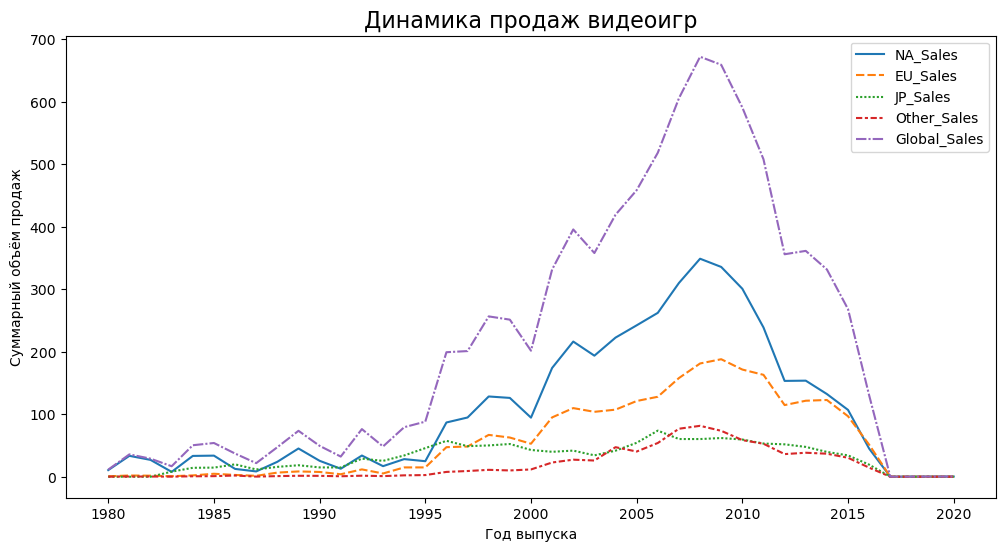

In [9]:
vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

In [8]:
vg_data.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

Представляет собой последовательность точек, соединенных линией. Каждая точка - это пара координат x и y, которые отображены по осям абсцисс и ординат (в двумерном случае). 

На практике в Data Science такие графики чаще всего используются для визуализации временных рядов, например, чтобы отследить динамику продаж во времени, число активных пользователей по дням, изменение курса валют и акций. 
График особенно бывает полезен, когда вы пытаетесь спрогнозировать ряд и вам необходимо увидеть свой прогноз на графике и сравнить его с действительностью.


### <center> 2. Гистограмма

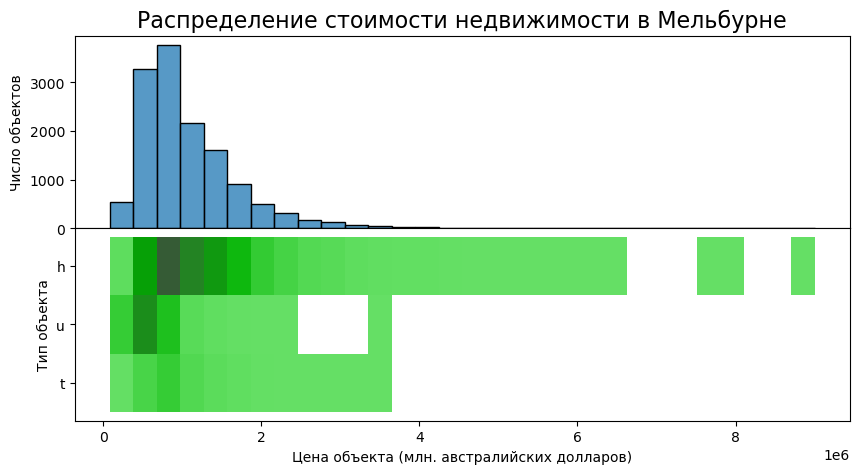

In [10]:
melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта');

Гистограмма - это способ визуализации частоты попадания признака в некоторый численный интервал. Гистограмма состоит из прямоугольников, расположенных вдоль оси x. Ось разбита на интервалы, их еще называют корзинами (bins), их число задается пользователем. Ширина интервалов одинакова и задает ширину прямоугольника. По оси y откладывается высота прямоугольника - количество наблюдений, которые попали в интервал, чем выше столбик, тем больше наблюдений находятся в интервале.

Гистограммы часто используются для оценки распределения числового признака, например, мы можем понять как распределены цены на товары, число шагов, которые делает пользователь умных часов, масса метеоритов, падающих на землю.

### <center> 3. Диаграмма рассеяния

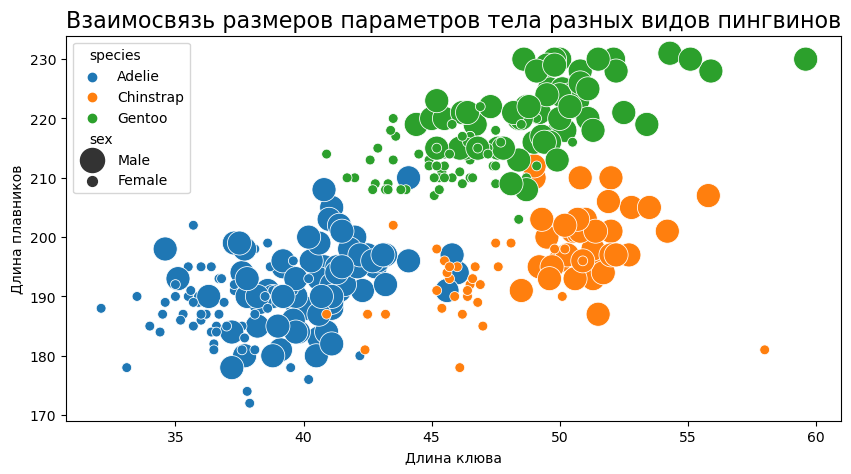

In [12]:
penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина плавников');

График представляет собой облака точек, по оси абсцисс откладывается одна числовая переменная, а по оси ординат - вторая, а каждая точка на графике - это запись из таблицы. 

Диаграммы рассеяния являются стандартным средством визуализации связи между двумя числовыми переменными. Однако, покопавшись в настройках графика, в исследование зависимости можно добавить и несколько категориальных переменных.

Диаграммы рассеяния являются мощным инструментом, который очень широко используется в Data Science. С помощью нее мы можем увидеть как зависит (или не зависит) давление от возраста пациента, объем продаж товаров от количества показанной рекламы и т.д. 
Оценив взаимосвязь признаков, мы можем принять решение, использовать ли какой-то из признаков для предсказания или нет.


### <center> 2.4. Boxplot

Коробчатые диаграммы, которые были введены в употребление Тьюки в 1977 году, являются новым типом диаграмм для исследования распределения числового признака по отношению к предыдущим. Диаграмма основана на понятии квантилей. Приведем общую схему построения диаграммы:


Основные составляющие графика:
1. **Ящик или коробка**. Левая граница коробки соответствует значению Q25, правая - Q75, а линия внутри коробки - медиане. Ширина ящика называется межквартильным размахом (Interquartile range) и вычисляется как IQR = Q75 -Q25. 
2. **Усы ящика**, длина которых равна 1.5 IQR. Крайние точки усов часто обозначаются в литературе как “min” и “max” и называются границами распределения. Фактически эти точки не всегда являются истинными минимумом и максимумом признака.
3. **Потенциальные выбросы** - точки лежащие за пределами границ. Согласно теории Тьюки эти точки следует считать аномалиями и они подлежат исключению из данных. Однако, на практике так бывает не всегда и необходимо проводить дополнительное исследование. Об этом мы будем говорить подробнее в модуле по очистке данных.

<img src= https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/изображение_2021-09-20_112110.png >

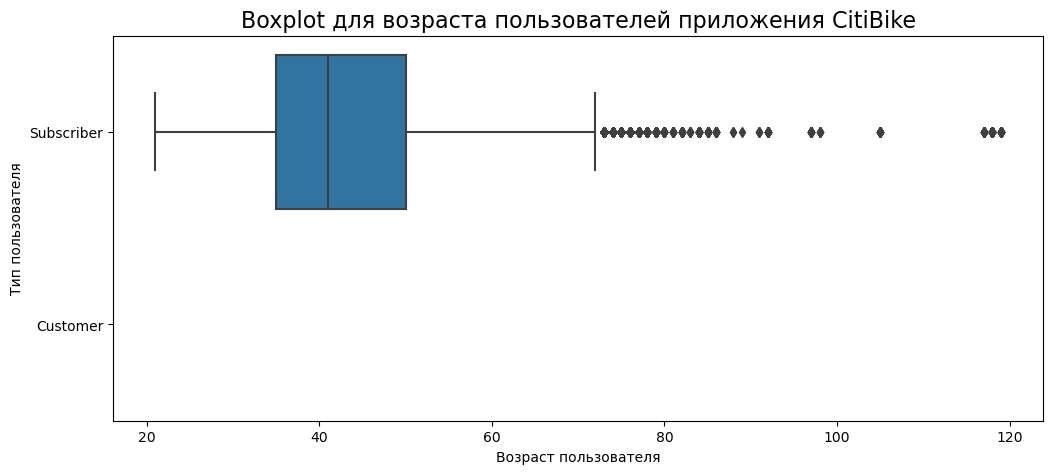

In [20]:
citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя');

Коробчатые диаграммы часто используются для поиска потенциальных выбросов в данных, а также для сравнения показателей нескольких распределений друг с другом: например, можно визуально сравнить медианные стоимости товаров разных магазинов или размах цен на квартиры в районах Москвы (размеры ящиков). По своей применимости коробчатые диаграммы часто являются более совершенными аналогами гистограмм. 

### <center> 5. Круговая диаграмма

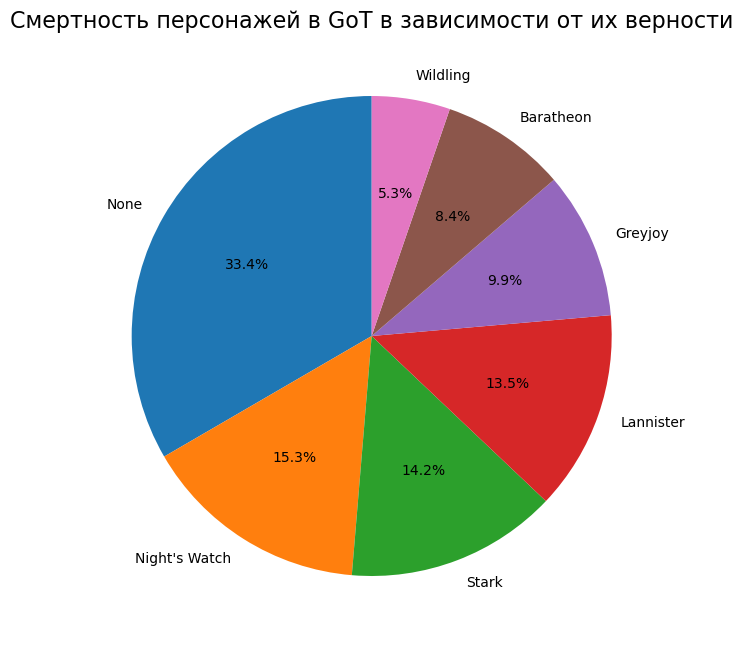

In [17]:
game_of_thrones_df = pd.read_csv('data/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

Диаграмма представляет собой круг, разделенный на сектора. Весь круг составляет 100%. Каждый из секторов отображает долю одной из категорий в данных и размер сектора соответствует части целого от круга. 

Диаграмма является способом визуализации для категориального признака, например, можно визуализировать и сравнивать доли от выручки, которые делает каждый продавец. 

Однако специалисты и эксперты по визуализации обычно сторонятся круговых диаграмм и предпочитают им столбчатые диаграммы. Главная причина - столбчатые диаграммы могут быть более информативными.


### <center> 6. Столбчатая диаграмма

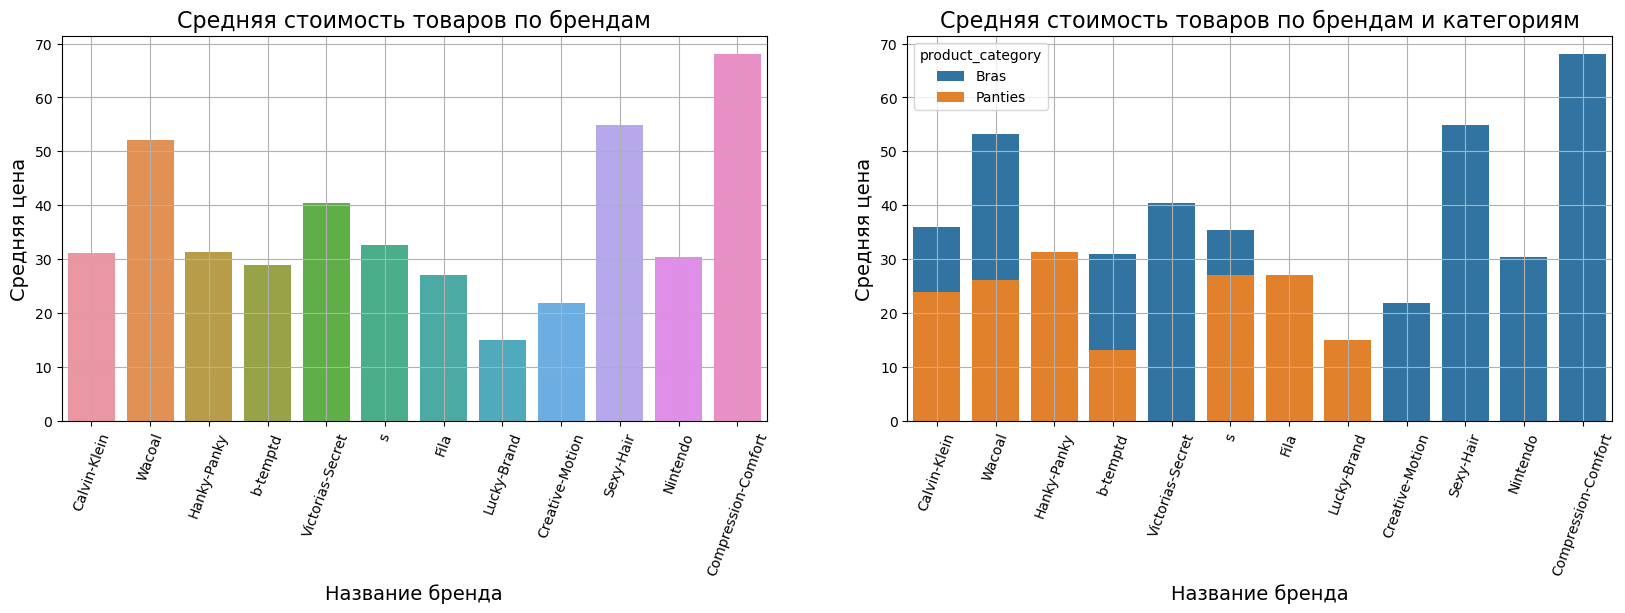

In [18]:
amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b-temptd'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '', regex=True).astype('float64')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

Столбчатая диаграмма тоже максимально проста: по оси x откладывается некоторый категориальный признак, для каждой категории которого рассчитан некоторый показатель (средняя цена товаров, медианная стоимость нефти, максимальная зафиксированная концентрация газа). Высота столбца и есть значение этого показателя. 

Основное применение столбчатых диаграмм в Data Science - это сравнить категории друг с другом. Например, сравнить рестораны по суммарной прибыли, сравнить средние расходы пользователей, медианную стоимость квартир по районам и т.д. 

Преимущество столбчатых диаграмм над круговыми в том, что в столбчатые диаграммы можно добавлять разделение по другим категориальным признакам и рассматривать совместное распределение показателей, тем самым, повышая информативность. Такие диаграммы называются многоуровневыми.


### <center> 7. Тепловая карта

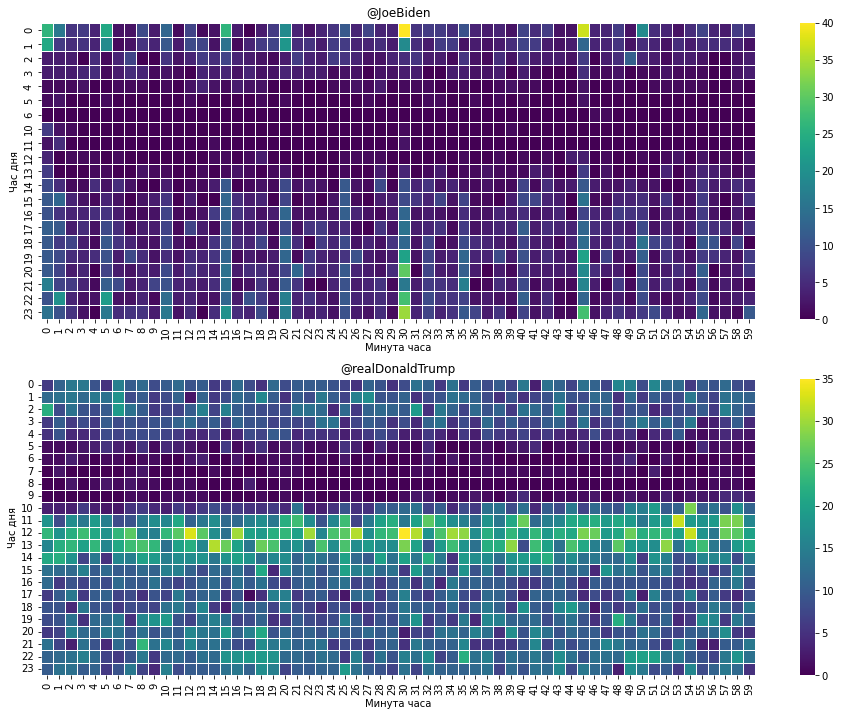

In [ ]:
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

Тепловая карта - это графическое представление некоторой таблицы, где значения в ячейках таблицы выделяются определенным цветом или интенсивностью цвета. Таблицей может быть как DataFrame, так и, например, изображение.

Применение тепловых карты очень различно: от визуализации категорий объектов на изображениях до графического представления матриц. При исследовании табличных данных они чаще всего применяются для визуализации сводных таблиц.


# COVID

In [22]:
covid_data = pd.read_csv('data/covid_data.csv')
covid_data.head()

date province/state country  confirmed  deaths  recovered
0  01/22/2020          Anhui   China        1.0     0.0        0.0
1  01/22/2020        Beijing   China       14.0     0.0        0.0
2  01/22/2020      Chongqing   China        6.0     0.0        0.0
3  01/22/2020         Fujian   China        1.0     0.0        0.0
4  01/22/2020          Gansu   China        0.0     0.0        0.0

Мы будем работать со следующими столбцами:

* date — дата наблюдения;
* province/state — наименование провинции/штата;
* country — наименование страны;
* confirmed — общее число зафиксированных случаев на указанный день;
* deaths — общее число зафиксированных смертей на указанный день;
* recovered — общее число выздоровлений на указанный день.

In [24]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data.head()

country        date  total_vaccinations  people_vaccinated  \
0  Afghanistan  2021-02-22                 0.0                0.0   
1  Afghanistan  2021-02-23                 NaN                NaN   
2  Afghanistan  2021-02-24                 NaN                NaN   
3  Afghanistan  2021-02-25                 NaN                NaN   
4  Afghanistan  2021-02-26                 NaN                NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated  \
0                            0.0                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations  \
0                                  NaN                 NaN   
1                                  NaN              1367.0   
2                                  NaN              1367.0   
3                                  NaN              1367.0   
4                                  NaN              1367.0   

                                            vaccines  
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...

Данная таблица содержит следующие столбцы:

* country — наименование страны;
* date — дата наблюдения;
* total_vaccinations — общее число введённых вакцин в стране на указанный день;
* people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
* people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );
* people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
* people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );
* daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
* vaccines — комбинации вакцин, используемые в стране.

In [26]:
# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. 
# Тем самым переходим от данных по регионам к данным по странам:

covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [27]:
# Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

covid_data['date'] = pd.to_datetime(covid_data['date'])

In [28]:
# Создадим признак больных на данный момент (active). 
# Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [30]:
# Cоздадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. 
# Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам 
# и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [31]:
# В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [38]:
# Задание 3.1
# 1 point possible (graded)
# За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).
# Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД
covid_data['date'].describe()

/var/folders/q7/y12hg0bj54sg455fwlths6dw0000gp/T/ipykernel_1543/3908781060.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  covid_data['date'].describe()


count                   86785
unique                    494
top       2021-05-28 00:00:00
freq                      194
first     2020-01-22 00:00:00
last      2021-05-29 00:00:00
Name: date, dtype: object

In [39]:
# Задание 3.2
# 1 point possible (graded)
# За какой период представлены данные в таблице vaccinations_data?
# В качестве ответа введите даты в формате datetime без указания времени.
# Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД
vaccinations_data['date'].describe()



/var/folders/q7/y12hg0bj54sg455fwlths6dw0000gp/T/ipykernel_1543/951732296.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  vaccinations_data['date'].describe()


count                   42795
unique                    279
top       2021-06-30 00:00:00
freq                      216
first     2020-12-02 00:00:00
last      2021-09-06 00:00:00
Name: date, dtype: object

In [59]:
# Задание 3.3
# 1 point possible (graded)
# С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
# Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. 
# То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. 
# Результат объединения занесите в переменную covid_df.
covid_df = pd.merge(covid_data, vaccinations_data, how='left', on=['date', 'country'])
covid_df.info()
covid_df.to_csv('data/covid_df.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [44]:
# В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) 
# и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) 
# и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.
covid_df['death_rate'] = (covid_df['deaths']/covid_df['confirmed'])*100
covid_df['recover_rate'] = (covid_df['recovered']/covid_df['confirmed'])*100

In [52]:
covid_df['country'].value_counts()
round(covid_df[covid_df['country']=='United States']['death_rate'].max(), 2)

7.19

In [53]:
# Задание 3.5
# 1 point possible (graded)
# Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.
round(covid_df[covid_df['country']=='Russia']['recover_rate'].mean(), 2)

67.06